In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [68]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [69]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [70]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate) 
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [71]:
# Save the weights
meso.model.save_weights('E:\ml\Meso4_DF.weights.h5')

# Upload the file to your project directory

# Ensure correct file path and load the weights
meso.model.load_weights('E:\ml\Meso4_DF.weights.h5')


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kavin\AppData\Local\Temp\ipykernel_8400\3474865994.py:2: SyntaxWarning: invalid escape sequence '\m'
  meso.model.save_weights('E:\ml\Meso4_DF.weights.h5')
C:\Users\kavin\AppData\Local\Temp\ipykernel_8400\3474865994.py:7: SyntaxWarning: invalid escape sequence '\m'
  meso.model.load_weights('E:\ml\Meso4_DF.weights.h5')


In [72]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    'E:\ml\data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kavin\AppData\Local\Temp\ipykernel_8400\3035874672.py:8: SyntaxWarning: invalid escape sequence '\m'
  'E:\ml\data',


Found 7104 images belonging to 2 classes.


In [73]:
# Checking class assignment
generator.class_indices

{'fake': 0, 'real': 1}

In [74]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

The system cannot find the path specified.


In [75]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'fake': 0, 'real': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Predicted likelihood: 0.4705
Actual label: 1

Correct prediction: False


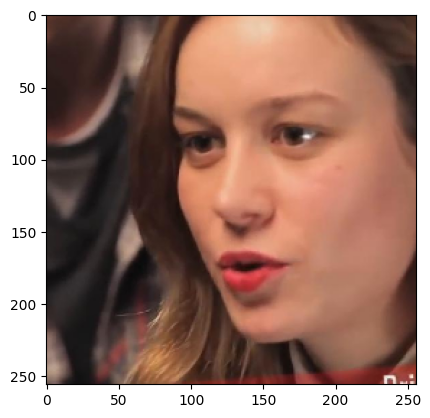

In [76]:
import matplotlib.pyplot as plt

# Get the next batch of data from the generator
X, y = next(generator)

# Evaluating prediction
predicted_likelihood = meso.model.predict(X)[0][0]
actual_label = int(y[0])
correct_prediction = round(predicted_likelihood) == y[0]

print(f"Predicted likelihood: {predicted_likelihood:.4f}")
print(f"Actual label: {actual_label}")
print(f"\nCorrect prediction: {correct_prediction}")

# Showing image
plt.imshow(np.squeeze(X))
plt.show()



In [77]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [78]:
# Generating predictions on the validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = next(generator)
    pred = meso.model.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred) == y[0] and y[0] == 1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred) == y[0] and y[0] == 0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0] == 1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels) - 1:
        print("All", len(generator.labels), "predictions completed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
0  predictions completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [79]:
def plotter(images, preds):
    if len(images) < 12 or len(preds) < 12:
        print("Insufficient data to plot.")
        return
    
    fig = plt.figure(figsize=(16, 9))
    subset_size = min(len(images), 12)
    subset = np.random.randint(0, len(images), subset_size)
    for i, j in enumerate(subset):
        fig.add_subplot(3, 4, i + 1)
        plt.imshow(images[j])
        plt.title(f"Prediction: {preds[j]:.4f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [80]:
plotter(correct_real, correct_real_pred)

Insufficient data to plot.
